# CSE 6369 - Spring 2023 - Homework 2 (Deep-Q-Network)


## Student Name: Gaurav Dilip Nale


## Student ID: 1001859699

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from google.colab import files
upload = files.upload()

Saving learning_algorithms.py to learning_algorithms.py


# Install packages

In [4]:
!pip install gymnasium==0.27.1 -q
!pip install "gymnasium[box2d]" -q
!pip install moviepy -q
!pip install -U kora -q

# Import libraries

In [2]:
import pickle
import random
import argparse
import moviepy
import matplotlib.pyplot as plt
import seaborn as sns
from kora.drive import upload_public
from google.colab import drive

drive.mount('/content/gdrive')
%cd gdrive/MyDrive/hw2/

from learning_algorithms import DQNTrainer
from utils import seed_everything

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/MyDrive/hw2/'
/content


# Train an agent

In [18]:
# set simulation parameters
params = {
    'env_name': 'CartPole-v1',
    'rng_seed': 6369,
    'n_episode': 35,
    'rm_cap': 8192,
    'batch_size': 128,
    'hidden_dim': 128,
    'init_epsilon': 0.1,
    'min_epsilon': 0.05,
    'epsilon_decay': 0.99,
    'gamma': 0.99,
    'tau': 0.005,
    'lr': 3e-3,
    'exp_name': 'CartPole_v1_t4'
}

# Seed RNGs
seed_everything(params['rng_seed'])

# Train agent
trainer = DQNTrainer(params)
trainer.run_training_loop()

End of episode 0 with epsilon =  0.10 and reward = 17, memory = 17
End of episode 1 with epsilon =  0.10 and reward = 31, memory = 48
End of episode 2 with epsilon =  0.10 and reward = 16, memory = 64
End of episode 3 with epsilon =  0.10 and reward = 40, memory = 104


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


End of episode 4 with epsilon =  0.10 and reward = 33, memory = 137
End of episode 5 with epsilon =  0.09 and reward = 37, memory = 174
End of episode 6 with epsilon =  0.09 and reward = 31, memory = 205
End of episode 7 with epsilon =  0.09 and reward = 14, memory = 219
End of episode 8 with epsilon =  0.09 and reward = 30, memory = 249
End of episode 9 with epsilon =  0.09 and reward = 36, memory = 285
End of episode 10 with epsilon =  0.09 and reward = 18, memory = 303
End of episode 11 with epsilon =  0.09 and reward = 14, memory = 317
End of episode 12 with epsilon =  0.09 and reward = 23, memory = 340
End of episode 13 with epsilon =  0.09 and reward = 13, memory = 353
End of episode 14 with epsilon =  0.09 and reward = 40, memory = 393
End of episode 15 with epsilon =  0.09 and reward = 14, memory = 407
End of episode 16 with epsilon =  0.08 and reward = 15, memory = 422
End of episode 17 with epsilon =  0.08 and reward = 16, memory = 438
End of episode 18 with epsilon =  0.08 a

Moviepy - Done !
Moviepy - video ready /content/CartPole/rl-video-episode-0.mp4


# Display Video

In [19]:
# (ref: https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive)
# Upload video
url = upload_public('CartPole/rl-video-episode-0.mp4')
# Then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

# Visualize learning curve

CartPole_v1_t4.pkl


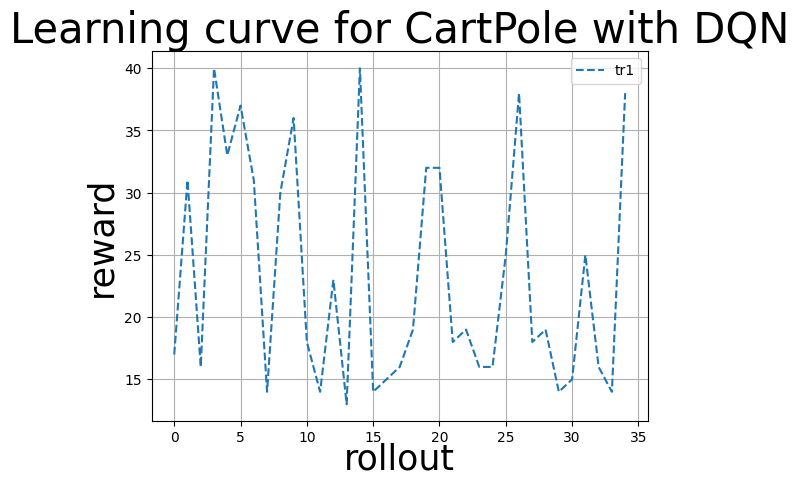

In [20]:
# (ref: http://rail.eecs.berkeley.edu/deeprlcourse/static/misc/viz.pdf)
file_name = params['exp_name'] + '.pkl'
print(file_name)
with open(file_name, 'rb') as f:
    ro_reward = pickle.load(f)

# Plot the data
sns.lineplot(data=ro_reward, linestyle='--', label='tr1')
plt.xlabel('rollout', fontsize=25, labelpad=-2)
plt.ylabel('reward', fontsize=25)
plt.title('Learning curve for CartPole with DQN', fontsize=30)
plt.legend()
plt.grid()
plt.show()

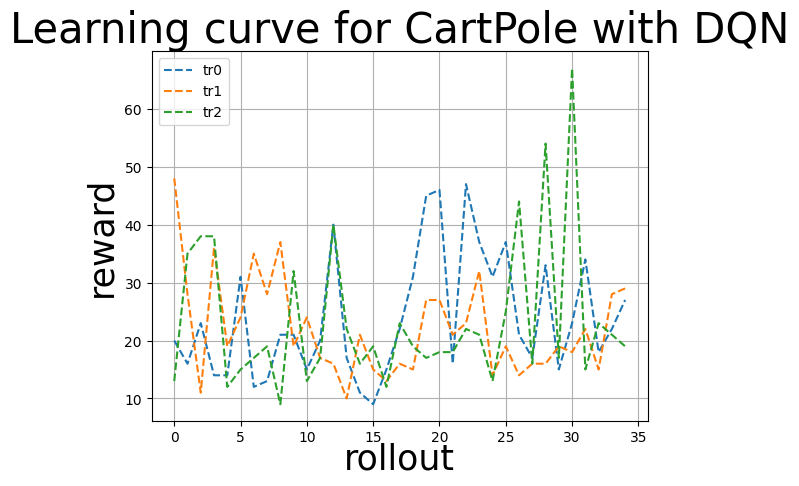

In [13]:
# (ref: http://rail.eecs.berkeley.edu/deeprlcourse/static/misc/viz.pdf)
file_name = params['exp_name'] + '.pkl'
with open(file_name, 'rb') as f:
    r2_reward = pickle.load(f)
file_name= 'CartPole_v1_t0.pkl'
with open(file_name, 'rb') as f:
    ro_reward = pickle.load(f)
file_name = 'CartPole_v1_t1.pkl'
with open(file_name, 'rb') as f:
    r1_reward = pickle.load(f)


# Plot the data
sns.lineplot(data=ro_reward, linestyle='--', label='tr0')
sns.lineplot(data=r1_reward, linestyle='--', label='tr1')
sns.lineplot(data=r2_reward, linestyle='--', label='tr2')
plt.xlabel('rollout', fontsize=25, labelpad=-2)
plt.ylabel('reward', fontsize=25)
plt.title('Learning curve for CartPole with DQN', fontsize=30)
plt.legend()
plt.grid()
plt.show()

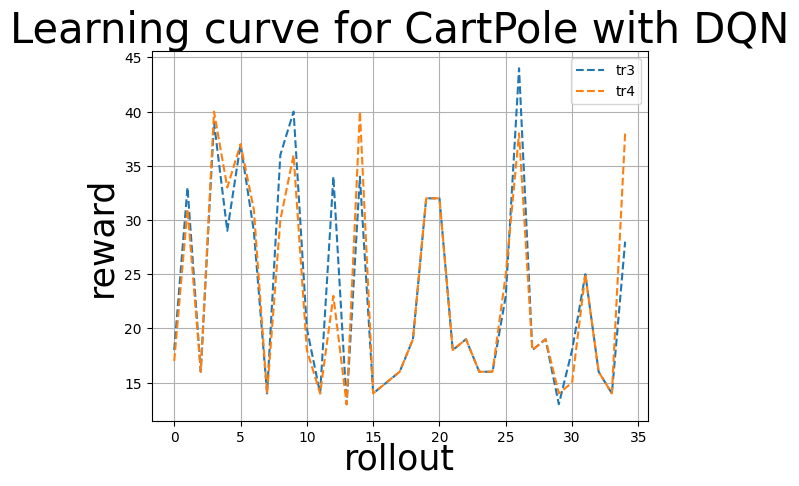

In [21]:
# (ref: http://rail.eecs.berkeley.edu/deeprlcourse/static/misc/viz.pdf)
file_name = params['exp_name'] + '.pkl'
with open(file_name, 'rb') as f:
    r4_reward = pickle.load(f)
file_name= 'CartPole_v1_t3.pkl'
with open(file_name, 'rb') as f:
    r3_reward = pickle.load(f)

# Plot the data
sns.lineplot(data=r3_reward, linestyle='--', label='tr3')
sns.lineplot(data=r4_reward, linestyle='--', label='tr4')
plt.xlabel('rollout', fontsize=25, labelpad=-2)
plt.ylabel('reward', fontsize=25)
plt.title('Learning curve for CartPole with DQN', fontsize=30)
plt.legend()
plt.grid()
plt.show()